<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/El_bueno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [982]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


In [983]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense,  GRU, LSTM, GlobalMaxPool1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [984]:
from google.colab import files
data_to_load = files.upload()

Saving Resumen_binario.csv to Resumen_binario.csv


In [985]:
df = pd.read_csv('Resumen_petroleo.csv', index_col='Fecha', parse_dates=True)
df.shape

(318, 6)

In [986]:
from sklearn.metrics import mean_absolute_percentage_error
from typing import ValuesView

In [987]:
# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

In [988]:
df['Log_MM'] = np.log(df['MM'])
df['Log_WTI'] = np.log(df['WTI'])
df['Log_Brent'] = np.log(df['BRENT'])
df['Log_DJI'] = np.log(df['DJI'])
df['Log_XAU'] = np.log(df['XAU'])
df['Log_Oil C1'] = np.log(df['Oil C1'])

In [989]:
train

,MM,WTI,BRENT,DJI,XAU,Oil C1,Log_MM,Log_WTI,Log_Brent,Log_DJI,Log_XAU,Log_Oil C1,DiffLogMM,DiffLogWTI,DiffLogBRENT,DiffLogDJI,DiffLogXAU,DiffLogOil C1
Fecha,,,,,,,,,,,,,,,,,,
1996-01-31,15.12,17.76,16.63,5395.30,406.45,17.74,2.716018,2.876949,2.811208,8.593283,6.007461,2.875822,NaN,NaN,NaN,NaN,NaN,NaN
1996-02-29,16.82,19.59,18.80,5485.62,399.75,19.54,2.822569,2.975019,2.933857,8.609885,5.990839,2.972464,0.106550,0.098070,0.122649,0.016602,-0.016622,0.096642
1996-03-29,18.35,21.43,20.33,5587.14,395.45,21.47,2.909630,3.064792,3.012098,8.628223,5.980024,3.066657,0.087061,0.089773,0.078241,0.018337,-0.010815,0.094193
1996-04-30,17.61,20.95,19.50,5569.07,391.65,21.20,2.868467,3.042139,2.970414,8.624983,5.970369,3.054001,-0.041163,-0.022653,-0.041683,-0.003239,-0.009656,-0.012655
1996-05-31,16.48,19.77,18.10,5643.17,391.00,19.76,2.802148,2.984166,2.895912,8.638201,5.968708,2.983660,-0.066319,-0.057973,-0.074503,0.013218,-0.001661,-0.070341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-05-31,95.58,91.93,100.43,15115.57,1386.90,91.97,4.559964,4.521027,4.609461,9.623481,7.234826,4.521462,-0.036771,-0.013935,-0.010893,0.018413,-0.063010,-0.016071
2013-06-28,96.30,96.36,102.49,14909.60,1234.25,96.56,4.567468,4.568091,4.629765,9.609761,7.118219,4.570165,0.007505,0.047064,0.020304,-0.013720,-0.116608,0.048702
2013-07-31,100.87,105.10,107.89,15499.54,1323.10,105.03,4.613833,4.654912,4.681112,9.648566,7.187733,4.654246,0.046364,0.086821,0.051347,0.038805,0.069514,0.084081


In [990]:
df['DiffLogMM'] = df['Log_MM'].diff() #crea una nueva columna con la diferencia del logaritmo 
df['DiffLogWTI'] = df['Log_WTI'].diff()
df['DiffLogBRENT'] = df['Log_Brent'].diff()
df['DiffLogDJI'] = df['Log_DJI'].diff()
df['DiffLogXAU'] = df['Log_XAU'].diff()
df['DiffLogOil C1'] = df['Log_Oil C1'].diff()

In [991]:
input_data = df[['DiffLogWTI','DiffLogBRENT','DiffLogDJI', 'DiffLogXAU','DiffLogOil C1']].values
targets = df['DiffLogMM'].values

In [992]:
input_data = df[['DiffLogWTI','DiffLogBRENT','DiffLogDJI', 'DiffLogXAU','DiffLogOil C1']].dropna()
targets = df['DiffLogMM'].dropna()

In [993]:
print(input_data.shape, targets.shape)

(317, 5) (317,)


In [994]:
# Now make the actual data which will go into the neural network
T = 24 #the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1] #en este ejemplo son 5 porque usamos 5 variables disitntas
N = len(input_data) - T # (e.g. if T = 10 and you have 11 data points then you'd onlye have 1 sample )
print(T,D,N, len(input_data)*1//3)

24 5 293 105


In [995]:
Ntest = len(input_data) * 1//3
train = df.iloc[:-Ntest] #todos -12
test = df.iloc[-Ntest:] #solo las últimas 12 observaciones

In [996]:
# boolean series to index df rows []
train_idx = df.index <= train.index[-1] #pone true a lo que sea train del data set y lo demás false
test_idx = df.index > train.index[-1] # pone true a lo que sea del test solamente y lo demás false
print(train_idx.shape, test_idx.shape)

(318,) (318,)


In [997]:
print(train_idx,len(input_data) - Ntest)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [998]:
# normalize the inputs
Ntrain = len(input_data) * 2//3 - T + 1 #// Ntrain = len(input_data) * 2//3  sin el -T es el orignal // EL CAMBIADO: Ntrain = len(input_data) * 2//3 - T + 1 
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T]) #escala los primeros 2/3 de datos + T
input_data = scaler.transform(input_data) # remplaza el dataset a los datos escalados

print(Ntrain)

188


In [999]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D)) #crea ceros del tensor de 3 dimensiones y la medida son los números de cada definición (1249,5,10)
Y_train = np.zeros(Ntrain)

for t in range(Ntrain): 
  X_train[t, :, :] = input_data[t:t+T] #es el recorrido que hacen los datos de 1 en 1 con las 5 variables // X_train[t, :, :] = input_data[t:t+T] 
  Y_train[t] = (targets[t+T]>0) #booleano, mientras t+T sean > a 0 entonces Y_train será igual a x numero

In [1000]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain , T, D)) #crea ceros del tensor de 3 dimensiones y la medida son los números de cada definición (1249-2/3 Ntrain ,5,10) // original : X_test = np.zeros((N - Ntrain, T, D)) 
Y_test = np.zeros(N - Ntrain) # (1249-839) //original : Y_test = np.zeros(N - Ntrain ) // el original: Y_test = np.zeros(N - Ntrain + T) 

#X_test = np.zeros((N - Ntrain + T, T, D)) 
#Y_test = np.zeros(N - Ntrain + T)


#Acá llenamos los ceros generados
for u in range(N - Ntrain): 
  # u ocunts from 0... (N - Ntrain)
  # t counts form Ntrain...N 
  t = u + Ntrain #(U toma de 0 hasta N, Ntrain siempre es 839)
  X_test[u, :, :] = input_data[t:t+T] #es el recorrido que hacen los datos de 1 en 1 con las 5 variables
  Y_test[u] = (targets[t+T]>0) #booleano, mientras t+T sean > a 0 entonces Y_train será igual a x numero

In [1001]:
print(X_train)

[[[ 0.95813413  1.04409343  0.26286024 -0.45922505  0.93349902]
  [ 0.86960666  0.63676757  0.30172432 -0.33913692  0.90763374]
  [-0.32982284 -0.46322144 -0.18146277 -0.31516258 -0.22098926]
  ...
  [-1.13383372 -0.30076744  1.0092702  -1.09797254 -0.7864075 ]
  [-0.9472045  -1.71844581  0.13342167 -0.676605   -1.27004705]
  [-0.35747606 -0.23838204 -0.1138469   0.8217372  -0.34798645]]

 [[ 0.86960666  0.63676757  0.30172432 -0.33913692  0.90763374]
  [-0.32982284 -0.46322144 -0.18146277 -0.31516258 -0.22098926]
  [-0.70663749 -0.76425347  0.18707911 -0.14981989 -0.83031815]
  ...
  [-0.9472045  -1.71844581  0.13342167 -0.676605   -1.27004705]
  [-0.35747606 -0.23838204 -0.1138469   0.8217372  -0.34798645]
  [-1.24600174 -1.38080059  1.63206593 -0.34236032 -1.23368758]]

 [[-0.32982284 -0.46322144 -0.18146277 -0.31516258 -0.22098926]
  [-0.70663749 -0.76425347  0.18707911 -0.14981989 -0.83031815]
  [ 0.51506035  0.4984075  -0.06352825 -0.68116199  0.51525555]
  ...
  [-0.35747606 -0.

In [1002]:
#RNN 
i = Input(shape=(T,D))
x = LSTM(4)(i)
x = Dense(1)(x)
model = Model(i,x)

In [1003]:
model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 24, 5)]           0         
                                                                 
 lstm_34 (LSTM)              (None, 4)                 160       
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [1004]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [1005]:
print(X_test.shape)

(105, 24, 5)


In [1006]:
print(Y_test.shape)

(105,)


In [1007]:
print(X_train.shape, Y_train.shape)

(188, 24, 5) (188,)


In [1008]:
print(X_test.shape, Y_test.shape)

(105, 24, 5) (105,)


In [1009]:
r = model.fit(
    X_train,
    Y_train,
    epochs=100,
    validation_data=(X_test,Y_test),
)

Epoch 1/100
6/6 [==============================] - 6s 283ms/step - loss: 0.5771 - val_loss: 0.6206
Epoch 2/100
6/6 [==============================] - 0s 35ms/step - loss: 0.5481 - val_loss: 0.5906
Epoch 3/100
6/6 [==============================] - 0s 35ms/step - loss: 0.5200 - val_loss: 0.5621
Epoch 4/100
6/6 [==============================] - 0s 30ms/step - loss: 0.4950 - val_loss: 0.5339
Epoch 5/100
6/6 [==============================] - 0s 61ms/step - loss: 0.4687 - val_loss: 0.5068
Epoch 6/100
6/6 [==============================] - 0s 48ms/step - loss: 0.4450 - val_loss: 0.4799
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 0.4208 - val_loss: 0.4539
Epoch 8/100
6/6 [==============================] - 0s 49ms/step - loss: 0.3974 - val_loss: 0.4293
Epoch 9/100
6/6 [==============================] - 0s 43ms/step - loss: 0.3754 - val_loss: 0.4059
Epoch 10/100
6/6 [==============================] - 0s 38ms/step - loss: 0.3567 - val_loss: 0.3829
Epoch 11/100
6/6 [

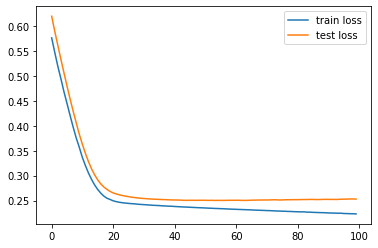

In [1010]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [1011]:
train_idx[:T+1] = False # First T+1 values are not predictable

In [1012]:
print(train_idx[:T+1]) #Me imprime lo que tenemos False en el entrenamiento 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]


In [1013]:
Ptrain = model.predict(X_train).flatten()
Ptest = model.predict(X_test).flatten()

4/4 [==============================] - 0s 9ms/step


In [1014]:
print(Ptrain.shape)

(188,)


In [1015]:
print(Ptest.shape)

(105,)


In [1016]:
print(input_data.shape)

(317, 5)


In [1017]:
print(200+105+12,211+94+12)

317 317


In [1018]:
#Needed to compute un-differenced predictions
df['ShiftLogMM'] = df['Log_MM'].shift(1) #cambia 1 periodo hacia adelante los datos
prev = df['ShiftLogMM']
ValuesView(prev.tail())

ValuesView(Fecha
2022-02-28    4.420165
2022-03-31    4.519612
2022-04-29    4.584967
2022-05-31    4.625169
2022-06-30    4.734706
Name: ShiftLogMM, dtype: float64)

In [1019]:
print(Ptrain.shape, prev[train_idx].shape)

(188,) (188,)


In [1020]:
# Last-known train value
last_train = train.iloc[-1]['Log_MM']

In [1021]:
ValuesView(last_train)

ValuesView(4.584355046274172)

In [1022]:
# 1-step forecast[]
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain #Te regresa las 121 observaciones con true //con el loc me regresa del df algo en específico //prev[train_idx] =121 lenght + 121 lenght ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest #Te regresa las 12 observaciones con true // prev[test_idx] 12 lenght + ptest 12 lenght

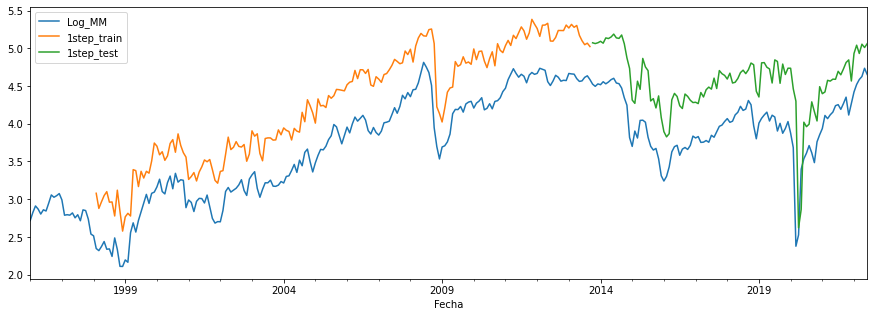

In [1023]:
# Plot 1-step forecast []
df[['Log_MM','1step_train','1step_test']].plot(figsize=(15,5));

In [1024]:
# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hideen units 
# K = number of output units

#Reshape the input_ to N x T x D

In [1025]:
#multi-step forecast
multistep_predictions = []

# first test input
last_x = X_test[0] #acá hay 10 observaciones

while len(multistep_predictions) < Ntest:#Ntest es 12, entonces el while es hasta 11. Prediceme las sig 12 observaciones. Recuerda que 11 es la 12 porque se incluye el 0
  p = model.predict(last_x.reshape(T, -1, D))[0]#damelo en 1 fila por x columnas que no se cuantas son. (el que debe de ir es 1,-1)
  #update the predictions list
  multistep_predictions.append(p)#añademe el resultado a p

  #make the new input
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 [==============================] - 0s 30ms/step


In [1026]:
print(p)

[0.09563296]


In [1027]:
#save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

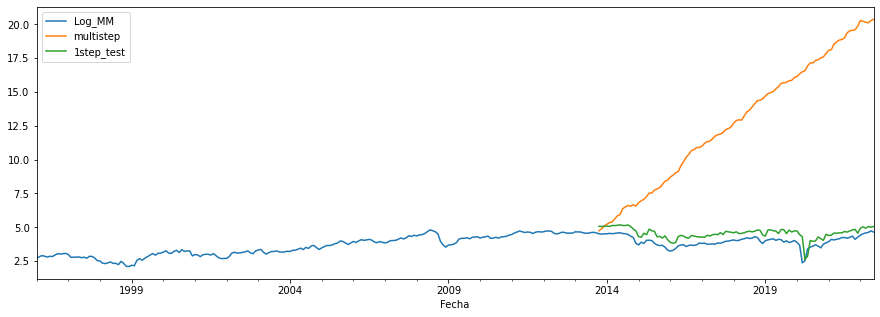

In [1028]:
#plot 1-step and multi-step forecast
df[['Log_MM','multistep','1step_test']].plot(figsize=(15,5));

In [1029]:
# make multi-output supevised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series)- Tx -Ty +1):
  x = series[t:t+Tx] #si t es 1 enotnces corre de 1 a 11
  X.append(x)
  y =series[t+Tx:t+Tx+Ty] #si t es 1, entonces corre de 11 a (1+10+12 = 23)
  Y.append(y)

X = np.array(X).reshape(-1, Tx, 1)
Y = np.array(Y).reshape(-1,Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1134, 24, 1) Y.shape (1134, 105)


In [1030]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [1031]:
#RNN
i = Input(shape=(Tx,1))
x = LSTM(12, return_sequences=True)(i)
x = GlobalMaxPool1D()(x) #NameError: name 'GlobalMaxPooling1D' is not defined
x = Dense(Ty)(x) #en este caso es 12 =Ty
model = Model(i,x)

In [1032]:
model.summary()

Model: "model_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 24, 1)]           0         
                                                                 
 lstm_35 (LSTM)              (None, 24, 12)            672       
                                                                 
 global_max_pooling1d_6 (Glo  (None, 12)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_32 (Dense)            (None, 105)               1365      
                                                                 
Total params: 2,037
Trainable params: 2,037
Non-trainable params: 0
_________________________________________________________________


In [1033]:
check_point  = ModelCheckpoint('best_model.h5', monitor ='val_loss',save_best_only=True)

In [1034]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [1035]:
r = model.fit(
    Xtrain_m,
    Ytrain_m,
    epochs=100,
    validation_data=(Xtest_m,Ytest_m),
)

Epoch 1/100
36/36 [==============================] - 5s 36ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 2/100
36/36 [==============================] - 1s 18ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 3/100
36/36 [==============================] - 1s 17ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 4/100
36/36 [==============================] - 1s 16ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 5/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 6/100
36/36 [==============================] - 1s 17ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 7/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 8/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 9/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 10/100
36/36 [==============================] - 1s 15ms/step - loss: 0.0088 - val_loss: 0.0075

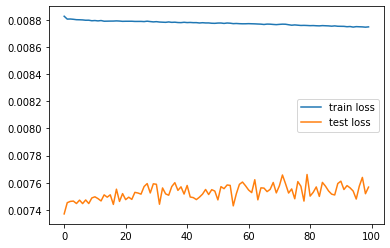

In [1036]:
#Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [1037]:
#load best model 
best_model = tf.keras.models.load_model('best_model.h5')


OSError: ignored

In [1038]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

1/1 [==============================] - 0s 24ms/step


In [1039]:
Ptrain.shape, Ptest.shape

((1133, 105), (1, 105))

In [1040]:
Ptrain = Ptrain[:,0]
Ptest = Ptest [0]

In [1041]:
print(Ptest)

[ 7.48250913e-03  8.99735373e-03  4.52265516e-03  3.67382308e-03
  4.45969077e-03  4.95780166e-03  1.05801998e-02  7.48446025e-03
  6.89832680e-03  4.59604058e-03  8.02908652e-03  5.83227351e-03
  5.76123083e-03  1.06424298e-02  4.92447801e-03  1.08144917e-02
  9.46149603e-03  1.20241083e-02  9.98479035e-03  7.49388803e-03
  1.06348591e-02  1.16993105e-02  1.16178123e-02  1.17900940e-02
  4.02813312e-03  1.19355461e-03  8.96710344e-03  4.77398187e-03
  7.82235246e-03  1.33942580e-04  2.95311399e-03  2.45586876e-03
  8.58078478e-04  6.05910411e-03  5.07152639e-03  1.14578148e-03
  3.19870329e-03  2.51517445e-03  5.28279692e-04  1.70442229e-03
  4.36589122e-03 -1.61111075e-03  2.07867799e-03  3.38105392e-03
  2.03683833e-03 -2.56160647e-03  7.63279153e-04 -8.08632467e-04
  5.54424152e-03  4.01799660e-03  8.55052262e-04  3.10112769e-03
  3.29827424e-03  3.73691274e-03  4.07699868e-03  3.74665204e-03
  2.69697141e-03  4.19976376e-03  3.70060280e-03  5.52338641e-03
  2.93967896e-03  3.08696

In [1042]:
# save multi-output forecast to dataframe []
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

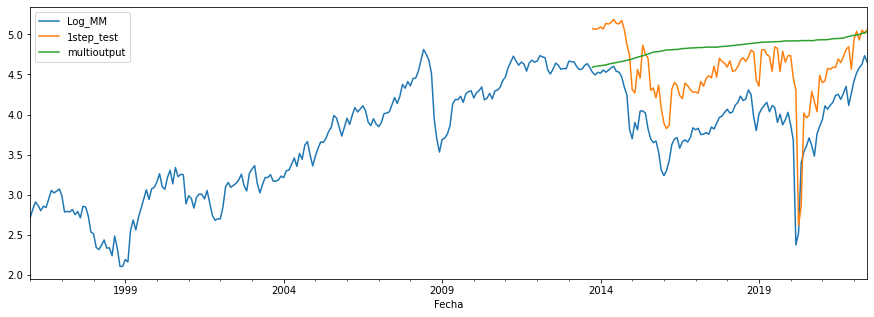

In [1043]:
#plot all forecasts
cols = ['Log_MM', '1step_test','multioutput']
df[cols].plot(figsize=(15,5));

In [1044]:
#RNN multiple LSTM Layers
i = Input(shape=(Tx,1)) #recuerda Tx = T 
x = LSTM(12, return_sequences=True)(i)
x = LSTM(12, return_sequences=True)(x)
x = GlobalMaxPool1D()(x) #convertir la secuencia en 1 solo vector y aplicar solo una capa de densidad al final
x = Dense(Ty)(x) #Ty = Ntest el cual es 12 en el ejemplo
model = Model(i,x)

In [1045]:
model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 24, 1)]           0         
                                                                 
 lstm_36 (LSTM)              (None, 24, 12)            672       
                                                                 
 lstm_37 (LSTM)              (None, 24, 12)            1200      
                                                                 
 global_max_pooling1d_7 (Glo  (None, 12)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_33 (Dense)            (None, 105)               1365      
                                                                 
Total params: 3,237
Trainable params: 3,237
Non-trainable params: 0
________________________________________________________

In [1046]:
check_point = ModelCheckpoint(
    'best_model.h5',monitor='val_loss',save_best_only=True)

In [1047]:
model.compile(
    loss='mse',
    optimizer='adam',
)

In [1048]:
r = model.fit(
    Xtrain_m,
    Ytrain_m,
    epochs=20,
    validation_data=(Xtest_m,Ytest_m),
)

Epoch 1/20
36/36 [==============================] - 7s 60ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 2/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 3/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 4/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 5/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 6/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 7/20
36/36 [==============================] - 1s 28ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 8/20
36/36 [==============================] - 1s 27ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 9/20
36/36 [==============================] - 1s 26ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 10/20
36/36 [==============================] - 1s 28ms/step - loss: 0.0088 - val_loss: 0.0075
Epoch 11/

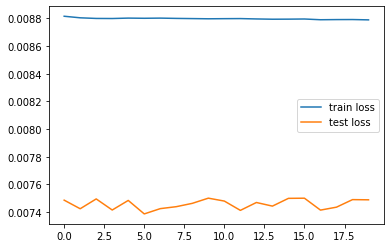

In [1049]:
#Plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [1050]:
#load best model 
best_model = tf.keras.models.load_model('best_model.h5')


OSError: ignored

In [1051]:
Ptrain = model.predict(Xtrain_m)
Ptest = model.predict(Xtest_m)

Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

1/1 [==============================] - 0s 31ms/step


In [1052]:
print(Ptest)

[ 0.00127811  0.00627721  0.00140371  0.00428006  0.00388463  0.00188742
  0.00390472  0.0045389   0.00137935  0.00252085  0.00612335  0.00339448
  0.00410087  0.00695376  0.0028785   0.00255055  0.00665791  0.00189161
  0.00255324  0.00413399  0.00389541  0.00501804  0.00661811  0.00389556
  0.00431422  0.00537625  0.00535574  0.00708853  0.00924512  0.00395645
  0.00581422  0.00437861  0.00450925  0.00574841  0.00659618  0.00370355
  0.00507056  0.00445174  0.00557151  0.00326302  0.00665262  0.00310143
  0.00327854  0.00483005  0.00324034  0.0036576   0.00352105  0.00386398
  0.00540422  0.00730974  0.00284147  0.00670483  0.00552227  0.00540396
  0.0064036   0.00867944  0.0043058   0.00507089  0.00549747  0.00362313
  0.00620703  0.00536166  0.00585993  0.00531647  0.00550128  0.0059758
  0.00529002  0.00687339  0.00519221  0.00328126  0.00449844  0.00342177
  0.00406763  0.00515998  0.00284137  0.00164359  0.0031408   0.00241455
  0.00326022  0.00439894  0.0022923   0.00126847  0.

In [1054]:
print(last_train)

4.584355046274172


In [1053]:
print( np.cumsum(Ptest))

[0.00127811 0.00755532 0.00895903 0.01323909 0.01712372 0.01901114
 0.02291587 0.02745476 0.02883411 0.03135496 0.03747831 0.04087279
 0.04497366 0.05192742 0.05480592 0.05735647 0.06401438 0.06590599
 0.06845922 0.0725932  0.07648861 0.08150665 0.08812476 0.09202032
 0.09633454 0.10171079 0.10706653 0.11415506 0.12340018 0.12735663
 0.13317086 0.13754946 0.14205872 0.14780712 0.1544033  0.15810685
 0.1631774  0.16762914 0.17320064 0.17646366 0.18311629 0.18621771
 0.18949625 0.1943263  0.19756663 0.20122422 0.20474528 0.20860925
 0.21401347 0.2213232  0.22416468 0.23086952 0.23639178 0.24179573
 0.24819934 0.2568788  0.2611846  0.2662555  0.27175298 0.2753761
 0.28158313 0.28694478 0.2928047  0.29812115 0.30362242 0.30959824
 0.31488827 0.32176167 0.3269539  0.33023515 0.3347336  0.33815536
 0.342223   0.34738296 0.35022435 0.35186794 0.35500875 0.3574233
 0.36068353 0.36508247 0.36737478 0.36864325 0.37128875 0.37301853
 0.37231943 0.37503606 0.37342817 0.37579346 0.38172752 0.382404

In [1055]:
#save multi-output forecast to dataframe []
df.loc[test_idx, 'multioutput2'] = last_train + \
  np.cumsum(Ptest)

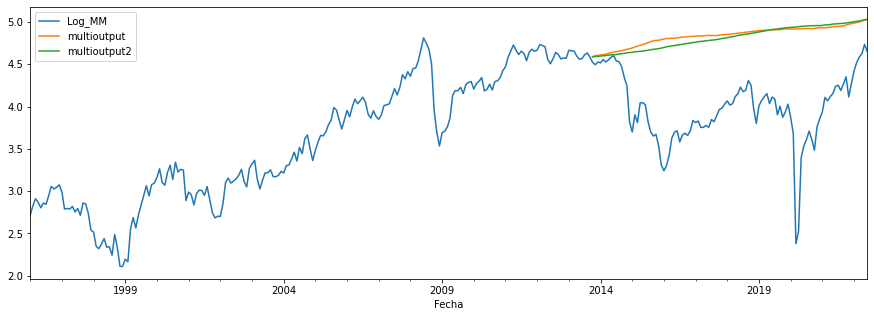

In [1059]:
# plot all forecasts
cols = ['Log_MM', 'multioutput','multioutput2']
df[cols].plot(figsize=(15,5));

In [1057]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['Log_MM']
mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass,df.loc[test_idx,'multioutput'])
print("multi-output MAPE:", mape2)
mape3 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput2'])
print("multi-output(2 LSTMs MAPE:", mape3)

multi-step MAPE: 2.249966143662003
multi-output MAPE: 0.23072436247653
multi-output(2 LSTMs MAPE: 0.22410208180562322
